In [4]:
! pip install -q simpletransformers

     |████████████████████████████████| 250 kB 2.1 MB/s 
     |████████████████████████████████| 1.9 MB 34.1 MB/s 
     |████████████████████████████████| 1.3 MB 46.9 MB/s 
     |████████████████████████████████| 7.6 MB 60.5 MB/s 
     |████████████████████████████████| 9.2 MB 41.6 MB/s 
     |████████████████████████████████| 432 kB 82.6 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 4.9 MB 62.7 MB/s 
     |████████████████████████████████| 163 kB 81.5 MB/s 
     |████████████████████████████████| 6.6 MB 48.5 MB/s 
     |████████████████████████████████| 182 kB 77.7 MB/s 
     |████████████████████████████████| 162 kB 77.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 162 kB 65.0 MB/s 
     |████████████████████████████████| 158 kB 69.5 MB/s 
     |████████████████████████████████| 157 kB 69.4 MB/s 
     |████████████████████████████████| 157 kB 72.2 MB/s 
     |█████████████

In [4]:
import pandas as pd
import shutil #extract winzip
import os
import numpy as np
#from pythainlp.tokenize import sent_tokenize
from pathlib import Path
from tqdm.auto import tqdm
import random

In [5]:
filePath = '/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data'

In [ ]:
list_file = os.listdir(filePath)

In [ ]:
test_file = []
train_file = []
val_file = []
for file in list_file:
  if random.uniform(0, 1)>0.85:
    test_file.append(file)
  else :
    train_file.append(file)    
    if random.uniform(0,1)>0.8:
      val_file.append(file)

In [ ]:
with open('train.txt', 'w') as f:
  for i in train_file:
    f.write(i+'\n')

In [ ]:
with open('val.txt', 'w') as f:
  for i in val_file:
    f.write(i+'\n')

In [ ]:
with open('test.txt', 'w') as f:
  for i in test_file:
    f.write(i+'\n')

In [70]:
one_fold = []
two_fold = []
three_fold = []
four_fold = []
five_fold = []
for file in train_file:
  if random.uniform(0, 1)>=0.8:
    five_fold.append(file)
  elif random.uniform(0, 1)>=0.6 and random.uniform(0, 1)<0.8:
    four_fold.append(file)
  elif random.uniform(0, 1)>=0.4 and random.uniform(0, 1)<0.6:
    three_fold.append(file)
  elif random.uniform(0, 1)>=0.2 and random.uniform(0, 1)<0.4:
    two_fold.append(file)
  else :
    one_fold.append(file)

In [6]:
_NER_TAGS = ["O","B-PER","PER","B-DTM","DTM","B-LOC","LOC","B-ORG","ORG",]

In [7]:
topic = []
word = []
label = []
i=0
for file in train_file: 
  if '.csv' in file:
    data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
    for j in range(len(data[0])):
      topic.append(i)
      word.append(str(data[0][j]))
      if str(data[1][j])=='nan':
        label.append('O')
      else :
        label.append(data[1][j])
        if data[1][j] not in _NER_TAGS:
          print(file)
          print(data[1][j])
          print(data[0][j])
        
    i=i+1

# **Data Preparation**

In [8]:
train_data = pd.DataFrame({'sentence_id': topic, 'words':word,'labels':label})

In [9]:
train_data

sentence_id  words labels
0                 0   เกาะ  B-LOC
1                 0     ยอ    LOC
2                 0             O
3                 0   เป็น      O
4                 0   เกาะ      O
...             ...    ...    ...
209959          209     มี      O
209960          209    ดัง      O
209961          209    นี้      O
209962          209    ตาม      O
209963          209  ลำดับ      O

[209964 rows x 3 columns]

In [10]:
import matplotlib.pyplot as plt

In [ ]:
pd.Series(list(train_data['labels'])).value_counts(sort=False)

B-LOC      5925
LOC       13960
O        218761
B-PER      1516
PER        7196
B-DTM      3349
DTM        4225
ORG         679
B-ORG       316
dtype: int64

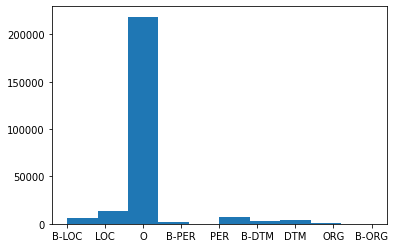

In [ ]:
plt.hist(label)

plt.show()

In [ ]:
a=list(train_data["labels"])
a.remove("O")

In [ ]:
b=[]
for i in a:
  if i != 'O':
    b.append(i)

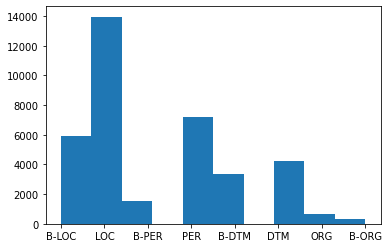

In [ ]:
plt.hist(b)
plt.show()

In [ ]:
list(train_data['labels']).count('O')

173972

In [11]:
topic1 = []
word1 = []
label1 = []
i=0
for file in val_file:
  data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
  for j in range(len(data[0])):
    topic1.append(i)
    word1.append(str(data[0][j]))
    if str(data[1][j])=='nan':
      label1.append('O')
    else :
      label1.append(data[1][j])
      if data[1][j] not in _NER_TAGS:
        print(file)
        print(data[1][j])
        print(data[0][j])
  i=i+1

In [12]:
eval_data = pd.DataFrame({'sentence_id': topic1, 'words':word1,'labels':label1})

In [13]:
eval_data

sentence_id    words labels
0                0      ข้า      O
1                0     หลวง      O
2                0   อังกฤษ    LOC
3                0    ประจำ      O
4                0    ปีนัง      O
...            ...      ...    ...
33142           36     เป็น      O
33143           36  สถานที่      O
33144           36  ประสูติ      O
33145           36      ของ      O
33146           36   พระราม    PER

[33147 rows x 3 columns]

In [14]:
topic2 = []
word2 = []
label2 = []
i=0
for file in test_file:
  data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
  for j in range(len(data[0])):
    topic2.append(i)
    word2.append(str(data[0][j]))
    if str(data[1][j])=='nan':
      label2.append('O')
    else :
      label2.append(data[1][j])
      if data[1][j] not in _NER_TAGS:
        print(file)
        print(data[1][j])
        print(data[0][j])
  i=i+1

In [15]:
test_data = pd.DataFrame({'sentence_id': topic2, 'words':word2,'labels':label2})

In [16]:
test_data

sentence_id    words labels
0                0   กระบี่    LOC
1                0               O
2                0     เป็น      O
3                0  จังหวัด      O
4                0    หนึ่ง      O
...            ...      ...    ...
45958           37               O
45959           37      และ      O
45960           37     พ.ศ.  B-DTM
45961           37               O
45962           37     2334    DTM

[45963 rows x 3 columns]

# **Train model**

In [ ]:
import torch

from simpletransformers.ner import NERModel, NERArgs

# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 64
ner_args.evaluate_during_training = True
ner_args.learning_rate = 0.0001
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 30
ner_args.max_seq_length = 128
# ner_args.max_seq_length = 510
model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

In [ ]:
# Train the model
model.train_model(train_data, eval_data=eval_data)

  0%|          | 0/210 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


Running Epoch 1 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Running Epoch 2 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

(120,
 defaultdict(list,
             {'global_step': [4,
               8,
               12,
               16,
               20,
               24,
               28,
               32,
               36,
               40,
               44,
               48,
               52,
               56,
               60,
               64,
               68,
               72,
               76,
               80,
               84,
               88,
               92,
               96,
               100,
               104,
               108,
               112,
               116,
               120],
              'train_loss': [1.4882503747940063,
               0.8804150819778442,
               0.9308021068572998,
               0.8285515308380127,
               1.015571117401123,
               0.8115372657775879,
               0.670685350894928,
               0.5116448998451233,
               0.3812752664089203,
               0.34071409702301025,
               0.29585

In [ ]:
model.results

{'eval_loss': 0.017315936647355555,
 'precision': 0.9770354906054279,
 'recall': 0.9811320754716981,
 'f1_score': 0.9790794979079498}

In [ ]:
label2=[]
result=[]
for file in test_file:
  topic2=[]
  word2=[]
  data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
  for j in range(len(data[0])):
    topic2.append(i)
    word2.append(str(data[0][j]))
    if str(data[1][j])=='nan':
      label2.append('O')
    else :
      label2.append(data[1][j])
      if data[1][j] not in _NER_TAGS:
        print(file)
        print(data[1][j])
        print(data[0][j])
  i=i+1
  pred,raw = model.predict(word2)

  for k in range(len(pred)):
    if pred[k]==[]:
      result.append('O')
    else:
      result.append(list(pred[k][0].values())[0])


  0%|          | 0/557 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/217 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/2221 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/278 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/935 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/4319 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/1009 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/2573 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/322 [00:00<?, ?it/s]

  0%|          | 0/359 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/2661 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/6765 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/846 [00:00<?, ?it/s]

  0%|          | 0/956 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/1481 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/2085 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/1427 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/397 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/930 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/706 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/959 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/492 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1204 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/791 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/651 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/1879 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/4719 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/590 [00:00<?, ?it/s]

In [17]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
print(precision_score(label2, result, average='micro'))
print(recall_score(label2, result, average='micro'))
print(f1_score(label2, result, average='micro'))

0.7035223984509279
0.7035223984509279
0.7035223984509279


In [ ]:
print(f1_score(label2, result, average='micro',labels=['B-LOC','LOC']))
print(f1_score(label2, result, average='micro',labels=['B-PER','PER']))
print(f1_score(label2, result, average='micro',labels=['B-ORG','ORG']))
print(f1_score(label2, result, average='micro',labels=['B-DTM','DTM']))
print(f1_score(label2, result, average='micro',labels='O'))

0.06548507462686569
0.02321319486866219
0.0
0.0028469750889679713
0.8385945108745587


Bert

In [ ]:
import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 64
ner_args.learning_rate = 0.0001
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 30
ner_args.max_seq_length = 128
# ner_args.max_seq_length = 510
model1 = NERModel(
    "bert", "monsoon-nlp/bert-base-thai", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

Downloading:   0%|          | 0.00/405 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized

Downloading:   0%|          | 0.00/489k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/113 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

In [ ]:
# Train the model
model1.train_model(train_data, eval_data=eval_data)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

Running Epoch 1 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

(120,
 defaultdict(list,
             {'global_step': [4,
               8,
               12,
               16,
               20,
               24,
               28,
               32,
               36,
               40,
               44,
               48,
               52,
               56,
               60,
               64,
               68,
               72,
               76,
               80,
               84,
               88,
               92,
               96,
               100,
               104,
               108,
               112,
               116,
               120],
              'train_loss': [1.1061028242111206,
               0.941238522529602,
               0.7963953018188477,
               0.7556058764457703,
               0.9959538578987122,
               0.5246769189834595,
               0.5358833074569702,
               0.5546612739562988,
               0.41005200147628784,
               0.47125664353370667,
               0.370

In [ ]:
model1.results

{'eval_loss': 0.26475528478622434,
 'precision': 0.830122591943958,
 'recall': 0.6204188481675392,
 'f1_score': 0.7101123595505617}

In [ ]:
label2=[]
result=[]
for file in test_file:
  topic2=[]
  word2=[]
  data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
  for j in range(len(data[0])):
    topic2.append(i)
    word2.append(str(data[0][j]))
    if str(data[1][j])=='nan':
      label2.append('O')
    else :
      label2.append(data[1][j])
      if data[1][j] not in _NER_TAGS:
        print(file)
        print(data[1][j])
        print(data[0][j])
  i=i+1
  pred,raw = model1.predict(word2)

  for k in range(len(pred)):
    if pred[k]==[]:
      result.append('O')
    else:
      result.append(list(pred[k][0].values())[0])

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/278 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/322 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/846 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/590 [00:00<?, ?it/s]

In [ ]:
print(precision_score(label2, result, average='micro'))
print(recall_score(label2, result, average='micro'))
print(f1_score(label2, result, average='micro'))

0.8846028327132693
0.8846028327132693
0.8846028327132693


In [ ]:
print(f1_score(label2, result, average='micro',labels=['B-LOC','LOC']))
print(f1_score(label2, result, average='micro',labels=['B-PER','PER']))
print(f1_score(label2, result, average='micro',labels=['B-ORG','ORG']))
print(f1_score(label2, result, average='micro',labels=['B-DTM','DTM']))
print(f1_score(label2, result, average='micro',labels='O'))

0.5430949358160531
0.17548076923076922
0.2916666666666667
0.4179271708683473
0.9413810110974106


Roberta

In [1]:
f = open("train.txt", "r")
train_file = f.readlines()

In [2]:
f = open("val.txt", "r")
val_file = f.readlines()

In [3]:
f = open("test.txt", "r")
test_file = f.readlines()

In [17]:
import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 64
ner_args.learning_rate = 0.0001
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 30
ner_args.max_seq_length = 128
# ner_args.max_seq_length = 510
model2 = NERModel(
    "roberta", "xlm-roberta-base", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLMRobertaTokenizer'. 
The class this function is called from is 'RobertaTokenizerFast'.


In [18]:
# Train the model
model2.train_model(train_data, eval_data=eval_data)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


Running Epoch 1 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Running Epoch 2 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

(120,
 defaultdict(list,
             {'global_step': [4,
               8,
               12,
               16,
               20,
               24,
               28,
               32,
               36,
               40,
               44,
               48,
               52,
               56,
               60,
               64,
               68,
               72,
               76,
               80,
               84,
               88,
               92,
               96,
               100,
               104,
               108,
               112,
               116,
               120],
              'train_loss': [2.304979085922241,
               0.9163883328437805,
               1.2391141653060913,
               0.9256035685539246,
               0.7768306136131287,
               0.5855791568756104,
               0.47009047865867615,
               0.3950570523738861,
               0.36225250363349915,
               0.17110152542591095,
               0.16

In [19]:
model2.results

{'eval_loss': 0.010173120396211743,
 'precision': 0.9881889763779528,
 'recall': 0.9920948616600791,
 'f1_score': 0.990138067061144}

In [20]:
label2=[]
result=[]
for file in test_file:
  topic2=[]
  word2=[]
  data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
  for j in range(len(data[0])):
    topic2.append(i)
    word2.append(str(data[0][j]))
    if str(data[1][j])=='nan':
      label2.append('O')
    else :
      label2.append(data[1][j])
      if data[1][j] not in _NER_TAGS:
        print(file)
        print(data[1][j])
        print(data[0][j])
  i=i+1
  pred,raw = model2.predict(word2)

  for k in range(len(pred)):
    if pred[k]==[]:
      result.append('O')
    else:
      result.append(list(pred[k][0].values())[0])

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/278 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/322 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/846 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/590 [00:00<?, ?it/s]

In [21]:
print(precision_score(label2, result, average='micro'))
print(recall_score(label2, result, average='micro'))
print(f1_score(label2, result, average='micro'))

0.9168461588669147
0.9168461588669147
0.9168461588669147


In [22]:
print(f1_score(label2, result, average='micro',labels=['B-LOC','LOC']))
print(f1_score(label2, result, average='micro',labels=['B-PER','PER']))
print(f1_score(label2, result, average='micro',labels=['B-ORG','ORG']))
print(f1_score(label2, result, average='micro',labels=['B-DTM','DTM']))
print(f1_score(label2, result, average='micro',labels='O'))

0.6849152038083903
0.5301016419077405
0.038610038610038616
0.5873261205564142
0.9593018919523655


Sentence Transformer

In [18]:
import tensorflow as tf 

In [19]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation

In [20]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 4.9 MB 78.4 MB/s 
     |████████████████████████████████| 1.3 MB 68.0 MB/s 
     |████████████████████████████████| 163 kB 80.1 MB/s 
     |████████████████████████████████| 6.6 MB 98.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2ed2e8fd2d7655e472433ddf01e6d5b54089af857a765d2ef5b06d8af93ec692
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [21]:
from sentence_transformers import SentenceTransformer

In [22]:
model_emb = SentenceTransformer('mrp/simcse-model-roberta-base-thai')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/677 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/356 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [23]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
from datetime import datetime
import os
import gzip
import csv

In [25]:
from sentence_transformers import SentenceTransformer, InputExample

In [26]:
from tqdm import tqdm

In [27]:
n=len(train_data['words'])//256

In [28]:
emb_list=[]
for i in range(n+1): 
  if i==n:
    embeddings = model_emb.encode(list(train_data.iloc[256*i:len(train_data["words"]),1]))
  else:
    embeddings = model_emb.encode(list(train_data.iloc[256*i:(256*(i+1)),1]))  
  emb_list=emb_list+list(embeddings)

In [29]:
def converlabel(_NER_TAGS,s):
  ind = _NER_TAGS.index(s)
  return ind

In [30]:
relabel=[]
for i in train_data['labels']:
  relabel.append(converlabel(_NER_TAGS,i))

In [31]:
new_emb_list = []
for i in tqdm(range(0,len(emb_list),18)):
  if i < len(emb_list)-18: 
    temp = emb_list[i:i+18]
  else:
    temp = emb_list[i:len(emb_list)]
    temp0 = [0]*768
    for j in range(18-(len(emb_list)-i)):
      temp.append(temp0)
  new_emb_list.append(temp)

100%|██████████| 11665/11665 [00:00<00:00, 530518.70it/s]


In [32]:
new_emb_list = np.asarray(new_emb_list,dtype='float32')

In [33]:
new_emb_list.shape

(11665, 18, 768)

In [34]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [35]:
from keras import layers

In [36]:
!pip install keras-crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 38.6 MB/s 


In [37]:
from keras_crf import CRFModel

In [38]:
from sentence_transformers import SentenceTransformer, models

In [39]:
def text_clasifier_lstm(input_shape):
    input = Input(shape=input_shape) 
    X = Bidirectional(layers.LSTM(256, return_sequences=True,dropout=0.5))(input)
    X = Bidirectional(layers.LSTM(256, activation='relu', return_sequences=True,go_backwards=True,dropout=0.5))(X)
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a batch of sequences.
    X = LSTM(128, return_sequences=True)(X)
    # Add dropout with a probability of 0.1
    X = Dropout(0.3)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128,return_sequences=True,go_backwards=True)(X)
    # Add dropout with a probability of 0.1
    X = Dropout(0.3)(X)
    # Propagate X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
    X = Dense(64)(X)
    # Add a softmax activation
    #X = Activation('softmax')(X)
    #main_lstm = layers.TimeDistributed(Dense(16, activation="relu"))(X)
    base=tf.keras.Model(inputs=input,outputs=X)
    model=CRFModel(base,18)
    # CRF
    #crf = CRF(17)  # CRF layer
    #out = crf(main_lstm)  # output
    # Create Model instance which converts sentence_indices into X.
    #model = Model(input, out)
    
    return model

In [40]:
modelbi = text_clasifier_lstm((18,768))

In [41]:
Y_train = []
for i in tqdm(range(0,len(relabel),18)):
  if i < len(relabel)-18: 
    temp = relabel[i:i+18]
  else:
    temp = relabel[i:len(relabel)]
    temp0 = 2
    for j in range(18-(len(relabel)-i)):
      temp.append(temp0)
  Y_train.append(temp)

100%|██████████| 11665/11665 [00:00<00:00, 918480.85it/s]


In [42]:
Y_train = np.asarray(Y_train,dtype='float32')

In [43]:
m=len(eval_data['words'])//256

In [44]:
emb_list1=[]
for i in tqdm(range(m+1)):
  if i==m:
    embeddings = model_emb.encode(list(eval_data.iloc[256*i:len(eval_data["words"]),1]))
  else:
    embeddings = model_emb.encode(list(eval_data.iloc[256*i:(256*(i+1)),1]))
  emb_list1=emb_list1+list(embeddings)

100%|██████████| 130/130 [00:16<00:00,  7.76it/s]


In [45]:
relabel1=[]
for i in eval_data['labels']:
  relabel1.append(converlabel(_NER_TAGS,i))

In [46]:
new_emb_list1 = []
for i in tqdm(range(0,len(emb_list1),18)):
  if len(emb_list1)-i<18:
    temp = emb_list1[i:len(emb_list1)]
    temp0 = [0]*768
    for j in range(18-(len(emb_list1)-i)):
      temp.append(temp0)
    new_emb_list1.append(temp)
  else:
    new_emb_list1.append(emb_list1[i:i+18])

100%|██████████| 1842/1842 [00:00<00:00, 395794.47it/s]


In [47]:
new_emb_list1 = np.asarray(new_emb_list1,dtype='float32')

In [48]:
Y_val = []
for i in tqdm(range(0,len(relabel1),18)):
  if len(emb_list1)-i<18:
    temp = relabel1[i:len(relabel1)]
    temp0=0
    for j in range(18-(len(relabel1)-i)):
      temp.append(temp0)
    Y_val.append(temp)
  else:
    Y_val.append(relabel1[i:i+18])

100%|██████████| 1842/1842 [00:00<00:00, 546425.35it/s]


In [49]:
Y_val=np.asarray(Y_val,dtype='float32')

In [50]:
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [51]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Intern_PSU_Phuket/Labeled_Data/best_bilstm3.h5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
modelbi.compile(optimizer=adam, loss=dice_coef_loss, metrics=["accuracy"])

In [52]:
modelbi.fit(new_emb_list, Y_train, epochs = 15, batch_size = 64, shuffle=True,validation_data=(new_emb_list1,Y_val), callbacks=[checkpoint]) 

Epoch 1/15
183/183 [==============================] - 40s 143ms/step - decode_sequence_accuracy: 0.8454 - loss: 15.6240 - val_decode_sequence_accuracy: 0.8393 - val_loss: 11.3601
Epoch 2/15
183/183 [==============================] - 21s 117ms/step - decode_sequence_accuracy: 0.8555 - loss: 9.9694 - val_decode_sequence_accuracy: 0.8471 - val_loss: 8.3357
Epoch 3/15
183/183 [==============================] - 25s 134ms/step - decode_sequence_accuracy: 0.8755 - loss: 6.1527 - val_decode_sequence_accuracy: 0.8961 - val_loss: 6.0557
Epoch 4/15
183/183 [==============================] - 26s 144ms/step - decode_sequence_accuracy: 0.9008 - loss: 8.4061 - val_decode_sequence_accuracy: 0.9190 - val_loss: 4.7975
Epoch 5/15
183/183 [==============================] - 23s 125ms/step - decode_sequence_accuracy: 0.9182 - loss: 3.5177 - val_decode_sequence_accuracy: 0.9373 - val_loss: 3.9589
Epoch 6/15
183/183 [==============================] - 21s 117ms/step - decode_sequence_accuracy: 0.9313 - loss: 3

In [53]:
topic2 = []
word2 = []
label2 = []
i=0
for file in test_file:
  data = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Labeled Data/'+file.replace('\n',''),header=None)
  for j in range(len(data[0])):
    topic2.append(i)
    word2.append(str(data[0][j]))
    if str(data[1][j])=='nan':
      label2.append('O')
    else :
      label2.append(data[1][j])
      if data[1][j] not in _NER_TAGS:
        print(file)
        print(data[1][j])
        print(data[0][j])
  i=i+1

In [54]:
test_data = pd.DataFrame({'sentence_id': topic2, 'words':word2,'labels':label2})

In [55]:
k=len(test_data['words'])//256

In [56]:
emb_list2=[]
for i in tqdm(range(k+1)):
  if i==k:
    embeddings = model_emb.encode(list(test_data.iloc[256*i:len(test_data["words"]),1]))
  else:
    embeddings = model_emb.encode(list(test_data.iloc[256*i:(256*(i+1)),1]))
  emb_list2=emb_list2+list(embeddings)

100%|██████████| 180/180 [00:20<00:00,  8.74it/s]


In [57]:
relabel2=[]
for i in test_data['labels']:
  relabel2.append(converlabel(_NER_TAGS,i))

In [58]:
new_emb_list2 = []
for i in tqdm(range(0,len(emb_list2),18)):
  if len(emb_list2)-i<18:
    temp = emb_list2[i:len(emb_list2)]
    temp0 = [0]*768
    for j in range(18-(len(emb_list2)-i)):
      temp.append(temp0)
    new_emb_list2.append(temp)
  else:
    new_emb_list2.append(emb_list2[i:i+18])

100%|██████████| 2554/2554 [00:00<00:00, 617314.15it/s]


In [59]:
new_emb_list2 = np.asarray(new_emb_list2,dtype='float32')

In [ ]:
new_emb_list2.shape

(2554, 18, 768)

In [60]:
res = modelbi.predict(new_emb_list2)

In [ ]:
res[0].shape

(932, 18)

In [61]:
solution_arr = [item for sublist in res[0] for item in sublist]

In [62]:
Y_test = []
for i in tqdm(range(0,len(relabel2),18)):
  if len(emb_list2)-i<18:
    temp = relabel2[i:len(relabel2)]
    temp0=0
    for j in range(18-(len(relabel2)-i)):
      temp.append(temp0)
    Y_test.append(temp)
  else:
    Y_test.append(relabel2[i:i+18])

100%|██████████| 2554/2554 [00:00<00:00, 903682.51it/s]


In [63]:
Y_test=np.asarray(Y_test,dtype='float32')

In [64]:
lab = [item for sublist in Y_test for item in sublist]

In [65]:
result_t=[]
for i in solution_arr:
  result_t.append(_NER_TAGS[i])

In [66]:
lab1=[]
for i in lab:
  lab1.append(_NER_TAGS[int(i)])

In [68]:
print(precision_score(lab1, result_t, average='micro'))
print(recall_score(lab1, result_t, average='micro'))
print(f1_score(lab1, result_t, average='micro'))

0.9654137300965805
0.9654137300965805
0.9654137300965805


In [69]:
print(f1_score(lab1, result_t, average='micro',labels=['B-LOC','LOC']))
print(f1_score(lab1, result_t, average='micro',labels=['B-PER','PER']))
print(f1_score(lab1, result_t, average='micro',labels=['B-ORG','ORG']))
print(f1_score(lab1, result_t, average='micro',labels=['B-DTM','DTM']))
print(f1_score(lab1, result_t, average='micro',labels='O'))

0.8841055256595353
0.8217405370430281
0.23272727272727275
0.9137240626137604
0.9834040812151588


In [ ]:
from sklearn.metrics import precision_score
precision_score(lab1, result_t, average='micro')

0.9644774011299435

In [ ]:
from sklearn.metrics import recall_score
recall_score(lab1, result_t, average='micro')

0.9644774011299435

In [ ]:
len(test_data['labels'])

42467

In [ ]:
len(result_t[0:42467])

42467

In [ ]:
test_data['result']=result_t[0:45963]

In [ ]:
test_data.to_csv('mismatch_result.csv',encoding='utf-8',index=False)

NameError: ignored

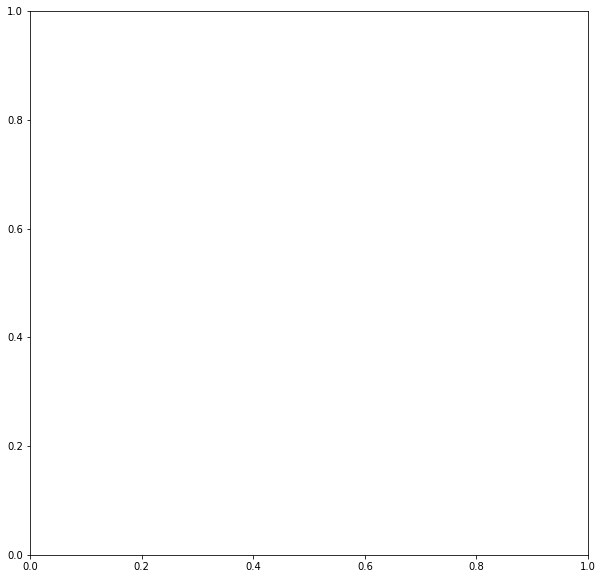

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(lab1, result_t)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(lab1, result_t,normalize='all')

In [ ]:
confusion_matrix.sum(axis=1)

array([  625,  1084,    70,   265,   728,  2597, 39200,   172,  1231])

In [ ]:
row_sums = confusion_matrix.sum(axis=0)
new_matrix = confusion_matrix / row_sums[:, np.newaxis]

In [ ]:
new_matrix

array([[8.95741557e-01, 2.93685756e-03, 0.00000000e+00, 0.00000000e+00,
        1.46842878e-03, 1.46842878e-03, 1.61527166e-02, 0.00000000e+00,
        0.00000000e+00],
       [8.56898029e-04, 8.77463582e-01, 0.00000000e+00, 2.57069409e-03,
        0.00000000e+00, 4.28449015e-03, 4.37017995e-02, 0.00000000e+00,
        0.00000000e+00],
       [8.33333333e-02, 2.50000000e-01, 1.00000000e+00, 2.58333333e+00,
        0.00000000e+00, 0.00000000e+00, 1.91666667e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.13310580e-01,
        0.00000000e+00, 3.41296928e-03, 1.12627986e-01, 0.00000000e+00,
        7.50853242e-02],
       [1.81564246e-02, 1.39664804e-03, 0.00000000e+00, 0.00000000e+00,
        8.95251397e-01, 1.39664804e-02, 8.65921788e-02, 0.00000000e+00,
        1.39664804e-03],
       [0.00000000e+00, 5.47045952e-03, 0.00000000e+00, 3.64697301e-04,
        1.09409190e-03, 8.53026988e-01, 6.34573304e-02, 0.00000000e+00,
        2.3

In [ ]:
new

In [ ]:
for i in range(new_matrix.shape[0]):
  for j in range(new_matrix.shape[0]):
    new_matrix[i][j]=round(new_matrix[i][j],2)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = new_matrix, display_labels =['B-DTM','B-LOC','B-PER','B-ORG','DTM','LOC','PER','O','ORG'])

In [ ]:
import matplotlib.pyplot as plt

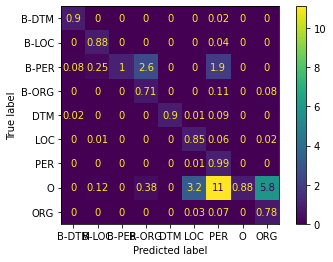

In [ ]:
cm_display.plot()
plt.show()